# Statistic & probability computer homework 1



## Import packages



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

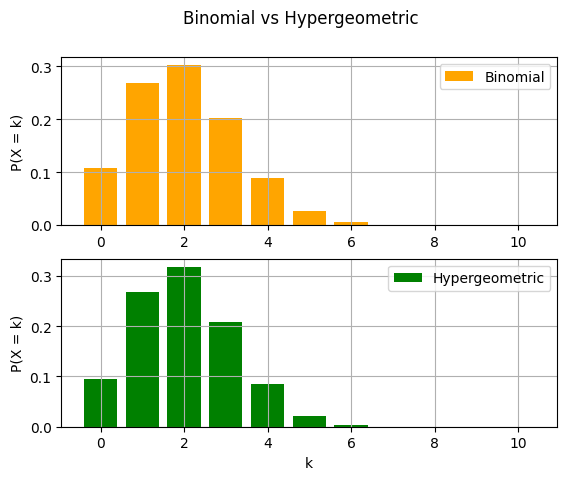

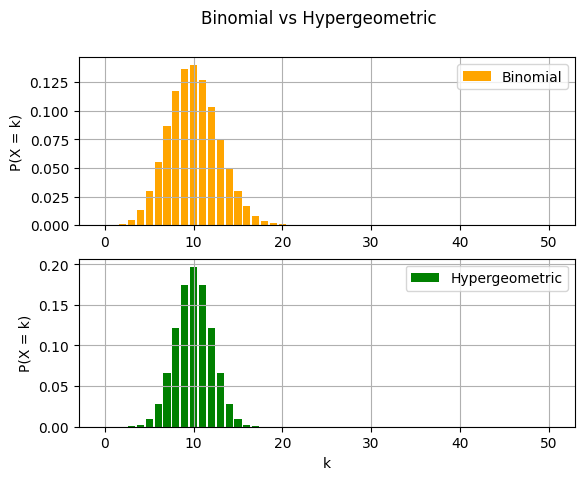

In [2]:
def combination(n, r):
    if n < r:
        return 0
    return np.math.factorial(n) // (np.math.factorial(r) * np.math.factorial(n - r))


def binomial(n, k, p):
    return combination(n, k) * p**k * (1 - p)**(n - k)


def hyper_geometric(n, k, N, M):
    assert n <= N, 'n must be less than or equal to N'
    assert M <= N, 'M must be less than or equal to N'
    assert k <= n, 'k must be less than or equal to n'
    return combination(M, k) * combination(N - M, n - k) / combination(N, n)


def plot(experiments):
    N = 100
    M = 20
    success_probability = M / N # p
    successes = np.arange(0, experiments + 1) # k = 0, 1, ..., n

    binomial_distribution = [binomial(experiments, k, success_probability) for k in successes]
    hyper_geometric_distribution = [hyper_geometric(experiments, k, N, M) for k in successes]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle('Binomial vs Hypergeometric')
    ax1.bar(successes, binomial_distribution, label='Binomial', color='orange')
    ax2.bar(successes, hyper_geometric_distribution, label='Hypergeometric', color='green')

    ax1.legend()
    ax2.legend()
    ax1.set_ylabel('P(X = k)')
    ax2.set_ylabel('P(X = k)')
    ax2.set_xlabel('k')
    ax1.grid(True)
    ax2.grid(True)


plot(10)
plot(50)
